# **Waze Users Data | Exploratory Data Analysis**

## Target Goals: 
* Conduct exploratory data analysis (EDA) on the Waze users data.
* Identify the missing values and outliers. 
* Make an executive summary of the analysis.

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

### **Task 1. Imports and data loading**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?
> The most applicable data columns are `label`, `sessions`, `drives`, `device`, `total_sessions`, `n_days_after_onboarding`, `driven_km_drives`, `duration_minutes_drives`, `activity_days` and `driving_days`.

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?
> The columns that can be eliminated are `ID`, `total_navigations_fav1` and `total_navigations_fav2`.

#### **Data overview and summary statistics**

In [4]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [5]:
df.size

194987

Generate summary statistics using the `describe()` method.

In [6]:
df.describe(include='all')

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14999.000000,14299,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
freq,NaN,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9672
mean,7499.000000,NaN,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,NaN
std,4329.982679,NaN,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,NaN,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,NaN
25%,3749.500000,NaN,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,NaN
50%,7499.000000,NaN,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,NaN
75%,11248.500000,NaN,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="images/Analyze.png" width="100" height="100" align=left>




            
## **PACE: Analyze**   

        
### Guide questions:
1. Does the data need to be restructured or converted into usable formats?
> No, the data is already in the structured format with each row representing a user.
2. Are there any variables that have missing data?
> Yes, 700 entries in the `label` column are missing. 

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

### Examining the spread and distribution of important variables using box plots and histograms:

#### Helper functions for boxplots and histograms

In [14]:
# Helper function for boxplots
def boxplotter(column_str, **kwargs):
    plt.figure(figsize=(5,1))        
    ax = sns.boxplot(x=df[column_str], **kwargs)              # Plot the boxplot
    plt.title(f'{column_str} boxplot')

In [15]:
# Helper function to plot histograms 
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments from the sns.histplot()                                                     
    median=round(df[column_str].median(),1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(x=median, color='red', linestyle='--')       # Plot the median
    if median_text==True:                                    # Add median text unless set to False 
        ax.text(0.25, 0.85, f'median={median}', color='red',
               ha='left', va='top', transform=ax.transAxes)
    else: 
        print(f'Median: {median}')
    plt.title(f'{column_str} histogram')

#### Helper function to plot the distributions

In [16]:
def distribution(column_str, median_text=True, **kwargs):      # **kwargs = any keyword arguments from the sns.histplot()   
    fig, axes = plt.subplots(1,2, figsize=(10,4))
    sns.boxplot(x=df[column_str], ax=axes[0])                  # Plot the boxplot
    axes[0].set_title(f'{column_str} boxplot')

    median=round(df[column_str].median(),1)
    sns.histplot(x=df[column_str], **kwargs, ax=axes[1])            # Plot the histogram
    plt.axvline(x=median, color='red', linestyle='--')              # Plot the median
    if median_text==True:                                           # Add median text unless set to False 
        axes[1].text(0.25, 0.85, f'median={median}', color='red',
               ha='left', va='top', transform=axes[1].transAxes)
    else: 
        print(f'Median: {median}')
    plt.title(f'{column_str} histogram')

    plt.tight_layout()

#### Variable 1: **`sessions`**

_The number of occurrence of a user opening the app during the month_

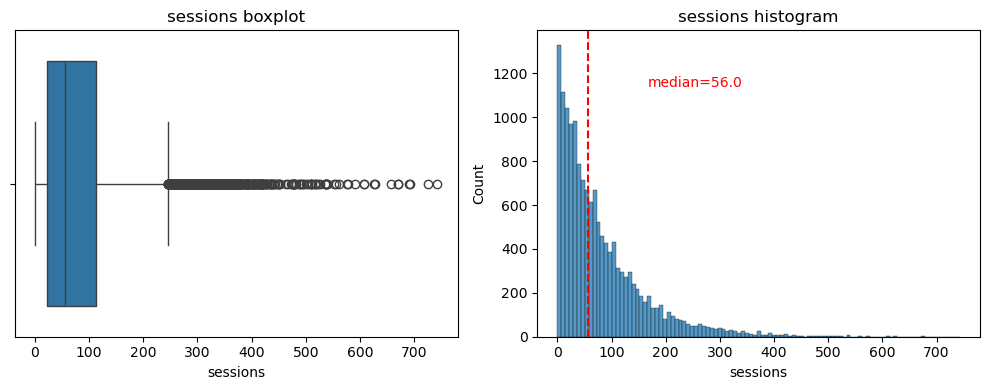

In [17]:
distribution('sessions')

> The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### Variable 2: **`drives`**

_An occurrence of driving at least 1 km during the month_

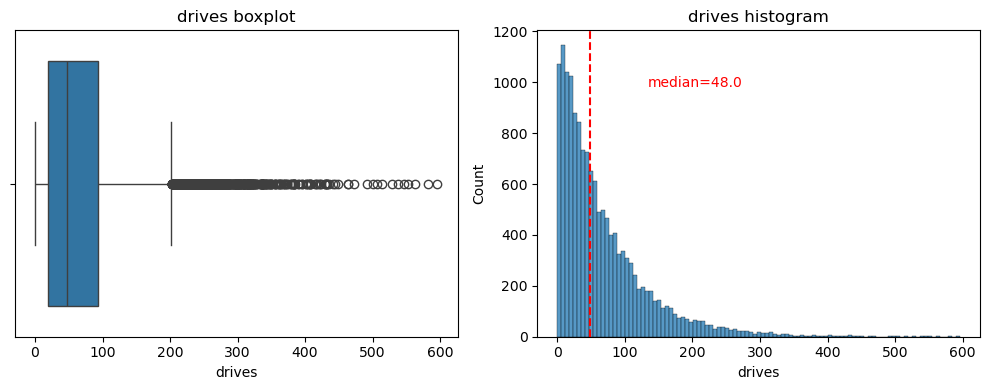

In [18]:
distribution('drives')

> The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, with a median of 48. However, some drivers had over 400 drives in the last month.

#### Variable 3: **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

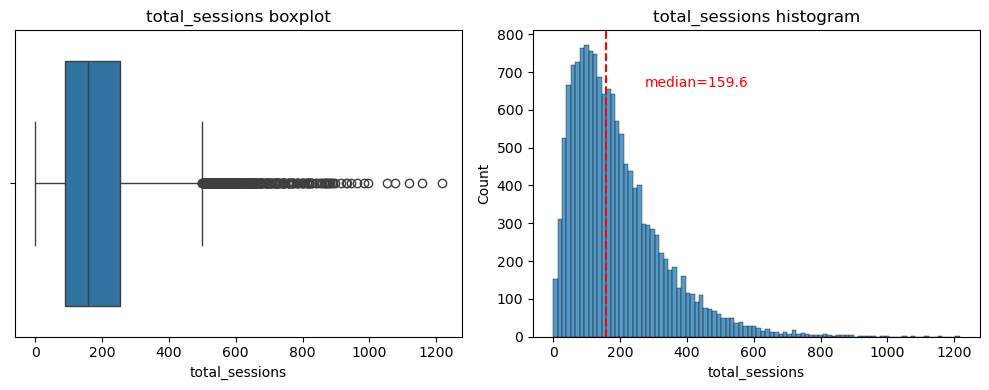

In [20]:
distribution('total_sessions')

> The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems that a large proportion of a user's total sessions might have taken place in the last month.

#### Variable 4: **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

Median: 1741.0


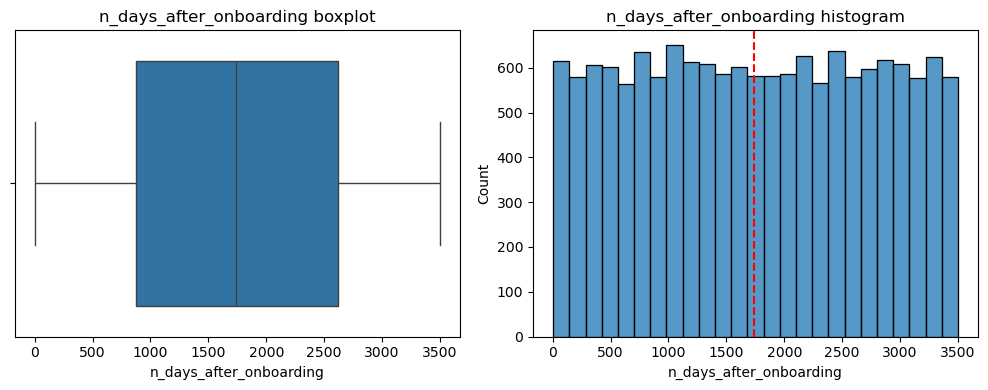

In [21]:
distribution('n_days_after_onboarding', median_text=False)

> The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### Variable 5: **`driven_km_drives`**

_Total kilometers driven during the month_

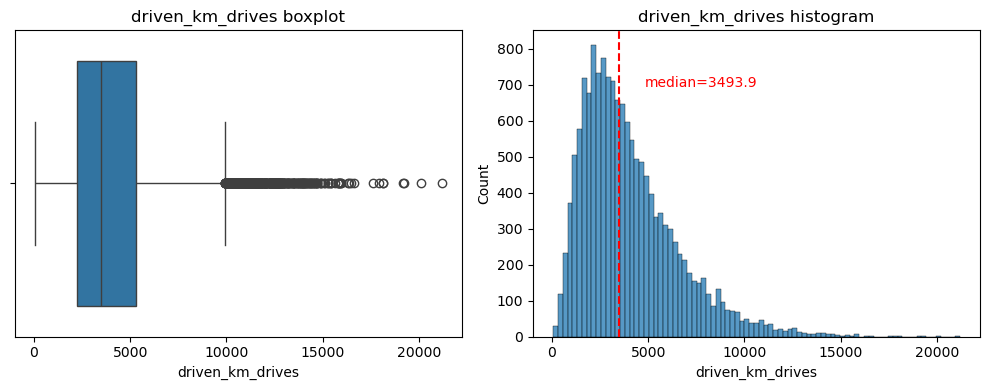

In [22]:
distribution('driven_km_drives')

> The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. In this dataset, the users drive _a lot_.

#### Variable 6: **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

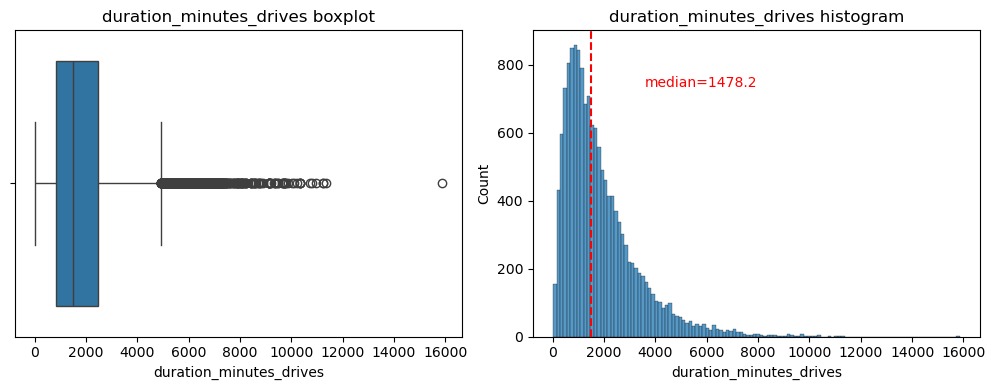

In [23]:
distribution('duration_minutes_drives')

> The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### Variable 7: **`activity_days`**

_Number of days the user opens the app during the month_

Median: 16.0


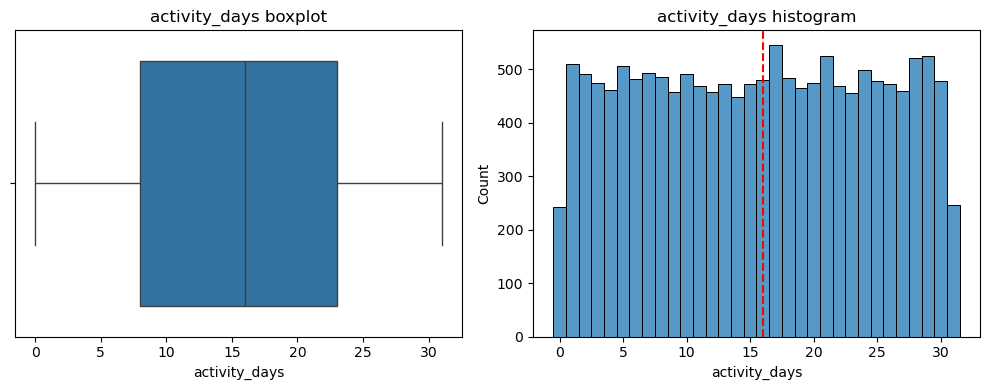

In [24]:
distribution('activity_days', median_text=False, discrete=True)

> Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

> This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### Variable 8: **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

Median: 12.0


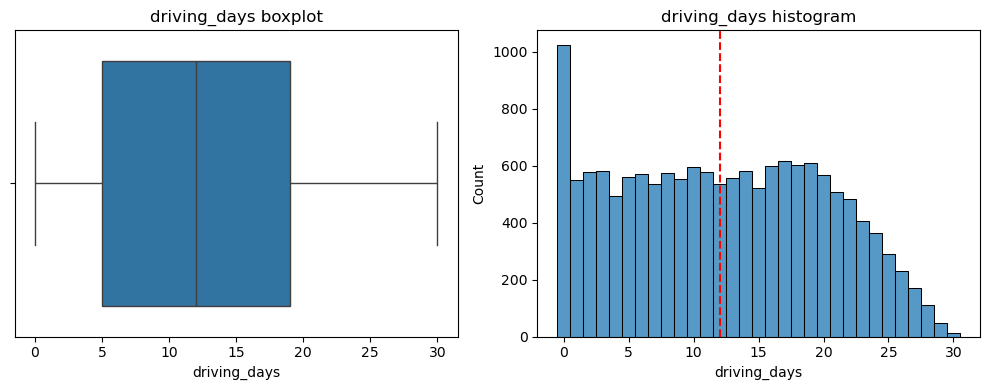

In [25]:
distribution('driving_days', median_text=False, discrete=True)

> The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

> However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### Variable 9: **`device`**

_The type of device a user starts a session with_

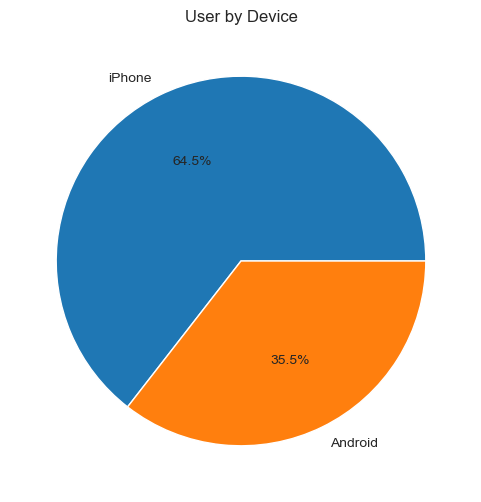

In [26]:
# Pie chart
data = df['device'].value_counts()
labels = ['iPhone', 'Android']
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('User by Device')
plt.show()

> There are nearly twice as many iPhone users as Android users represented in this data.

#### Target variable: **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

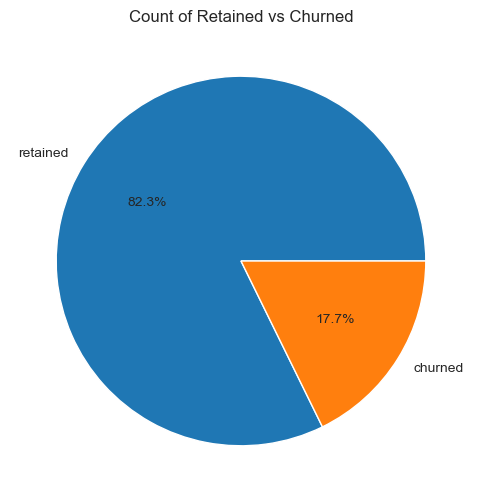

In [27]:
# Pie chart
data = df['label'].value_counts()
labels = ['retained', 'churned']
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Count of Retained vs Churned')
plt.show()

> Less than 18% of the users churned.

### Checking the relationship of the variables to each other: 

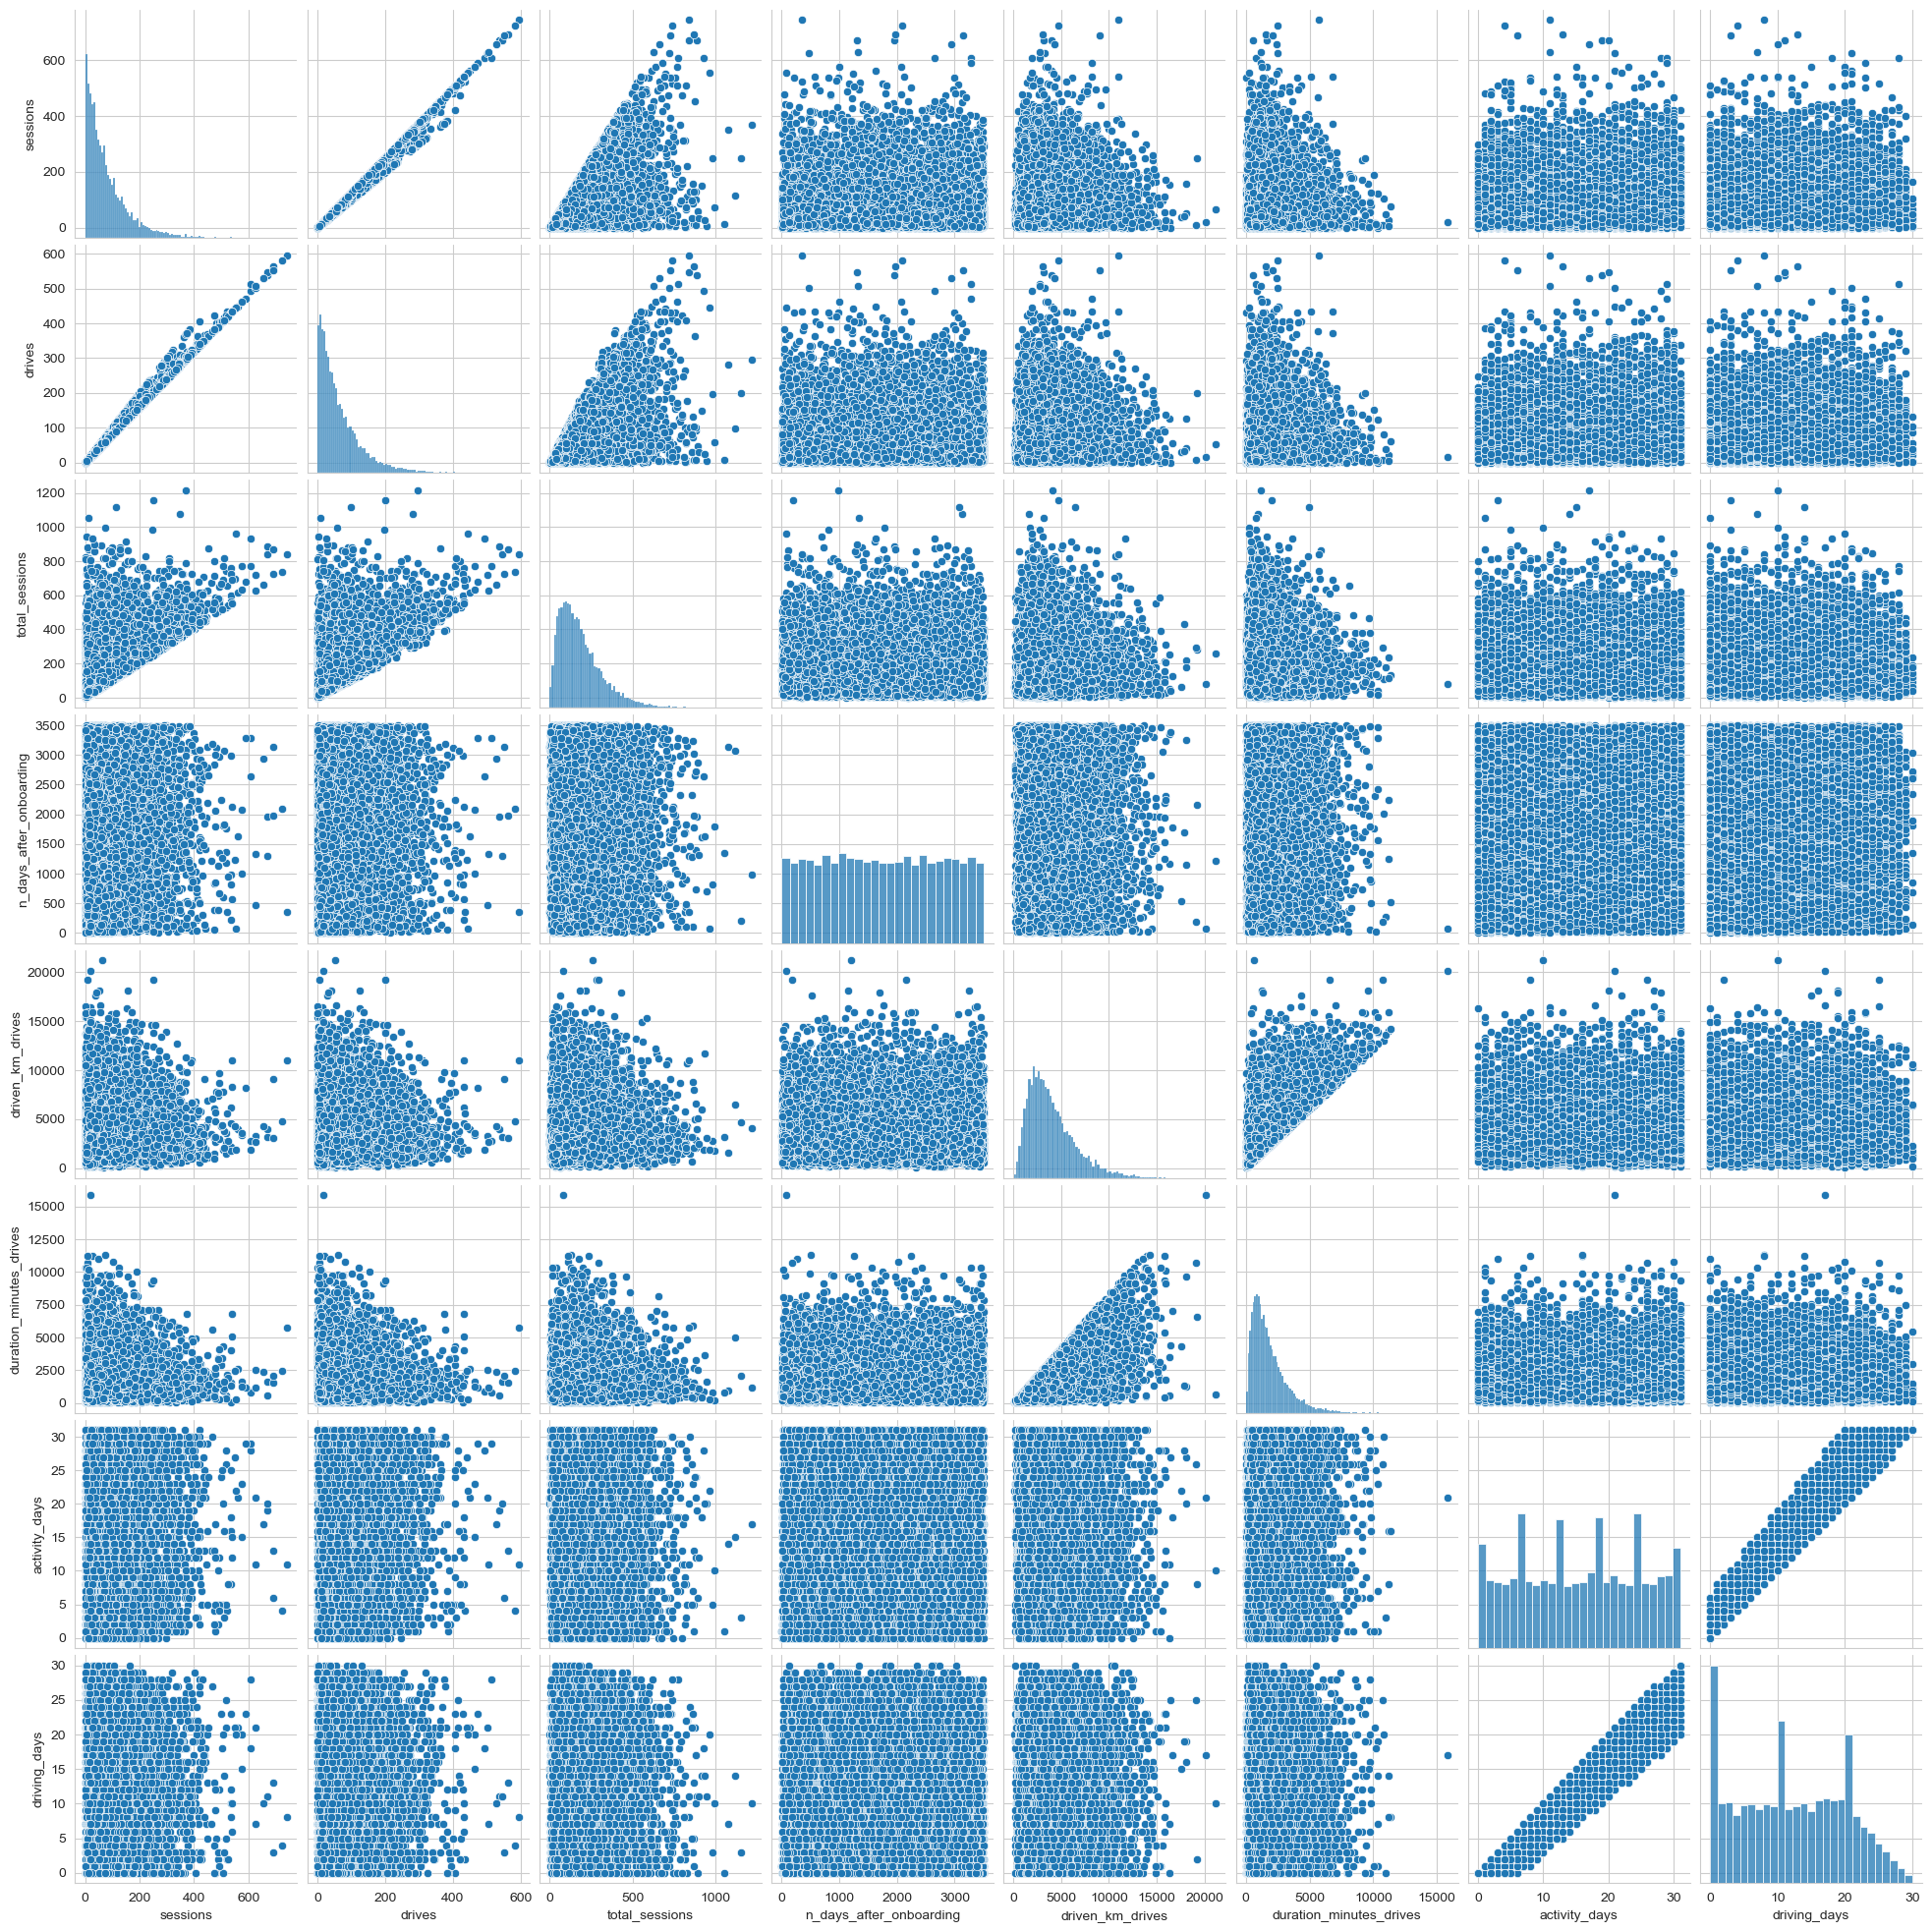

In [29]:
sns.pairplot(df[['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days']])
plt.show()

> From the pairplot above, notice that the number of `drives` and the number of `sessions` are strongly correlated, they might provide redundant information if both variables were incorporated in a model.  

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, they can be plotted together in a single histogram.

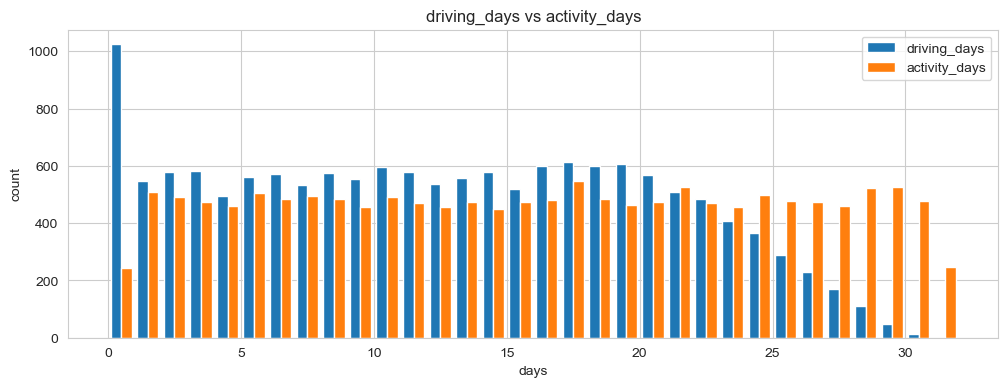

In [30]:
plt.figure(figsize=(12,4))
label=['driving_days', 'activity_days']
plt.hist([df['driving_days'], df['activity_days']], 
            bins=range(0,33), label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs activity_days')
plt.savefig('drive days vs activity days.png')
plt.show()

> The histogram above shows that while `driving_days` and `activity_days` are related, these variables are not the same. People probably open the app more than they use the app to drive. Perhaps to check drive times or route information, to update settings, or even just by mistake.  

> Moreover, the histogram reveals that the number of days in the month of the two variables is not the same. It might be worthwhile to contact the data owner to get more information about the two variables. 

In [32]:
# Confirm the maximum number of days for the monthly variables, driving_days and activity_days. 
max_dd = df['driving_days'].max()
max_ad = df['activity_days'].max()
print(f'Maximum driving day: {max_dd:1.0f}\nMaximum activity day: {max_ad:1.0f}')

Maximum driving day: 30
Maximum activity day: 31


> The number of days for the monthly variables is really different. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are about 15,000 users represented in the dataset.

> One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

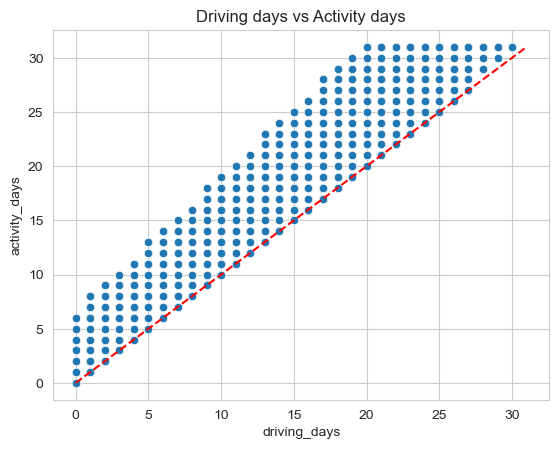

In [33]:
fig = sns.scatterplot(x='driving_days', y='activity_days', data=df)
fig.set_title('Driving days vs Activity days')
plt.plot([0,31],[0,31], color='red', linestyle='--')
plt.show()

> There is a theoretical limit&mdash;`driving_days` is always less than the `activity_days`.  If you use the app to drive, then by definition it must count as a day-use as well. You cannot have more drive-days than activity days. Notice than none of the samples in this data violate this rule. 

#### **Retention by device**

In [25]:
df.groupby(['device'])['label'].value_counts(normalize=True)

device   label   
Android  retained    0.824399
         churned     0.175601
iPhone   retained    0.821680
         churned     0.178320
Name: proportion, dtype: float64

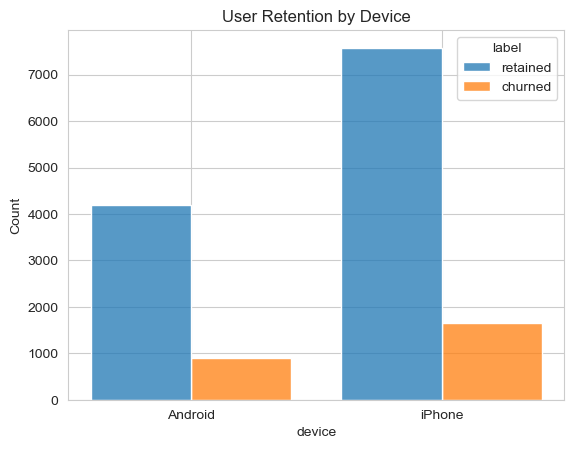

In [54]:
data = df[['label', 'device']]
fig = sns.histplot(data=data, x='device', hue='label', multiple='dodge', shrink=.8)
fig.set_title('User Retention by Device')
plt.savefig('user retention by device.png')
plt.show()

> The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

The median distance driven last month for users who churned was 3,652 km, versus 3,464 for people who did not churn. Examine this further.

In [34]:
df.groupby(['label']).median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


In [36]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 3. Check 
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

> The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

##### Plotting a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km: 

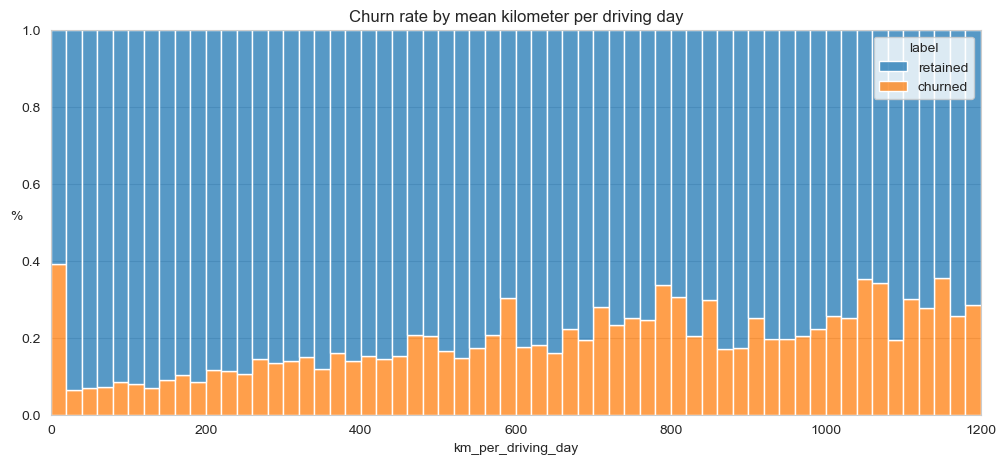

In [55]:
plt.figure(figsize=(12,5))
fig = sns.histplot(data=df, x='km_per_driving_day',
            bins=range(0,1201,20),
            hue='label',
            multiple='fill')
fig.set_ylabel('%', rotation=0)
fig.set_title('Churn rate by mean kilometer per driving day')
plt.savefig('churn rate by mean kilometer per driving day.png')
plt.show()

> The churn rate tends to increase as the mean daily distance driven increases. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

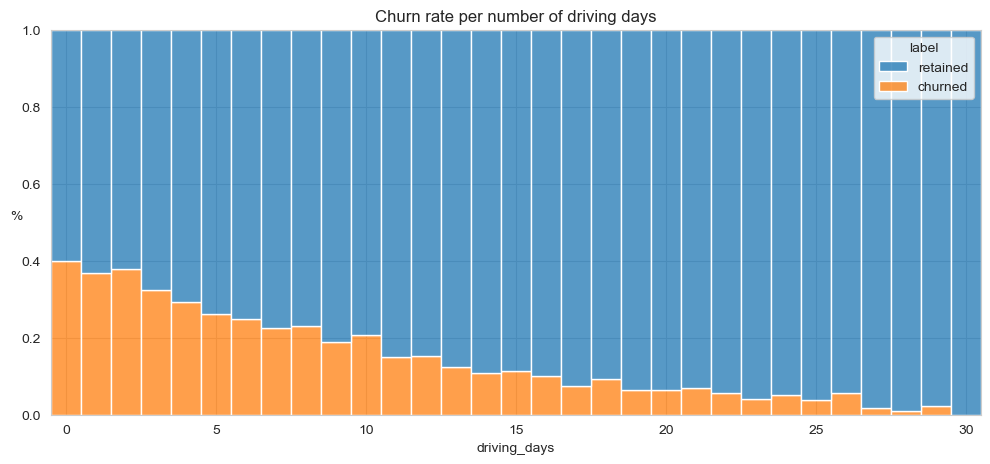

In [38]:
plt.figure(figsize=(12,5))
fig = sns.histplot(data=df, x='driving_days', 
            discrete=True,
            hue='label',
            multiple='fill')
fig.set_ylabel('%', rotation=0)
fig.set_title('Churn rate per number of driving days')
plt.savefig('churn rate per number of driving days.png')
plt.show()

> The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

##### Possible explanation of the situation: 
* If people who _used the app a lot churned_, it would likely indicate dissatisfaction.
* When people who _don't use the app churn_, it might be:
    * the result of dissatisfaction in the past.
    * indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore. 

#### **Proportion of sessions that occurred in the last month**

In [45]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

Median: 0.4


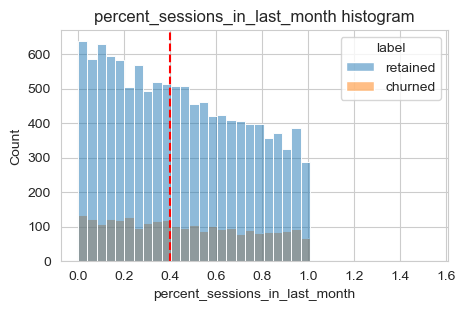

In [46]:
histogrammer('percent_sessions_in_last_month', hue=df['label'], 
             multiple='layer',
             median_text=False)

Median value of the `n_days_after_onboarding` variable: 

In [47]:
df['n_days_after_onboarding'].median()

1741.0

> Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

##### Histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month:

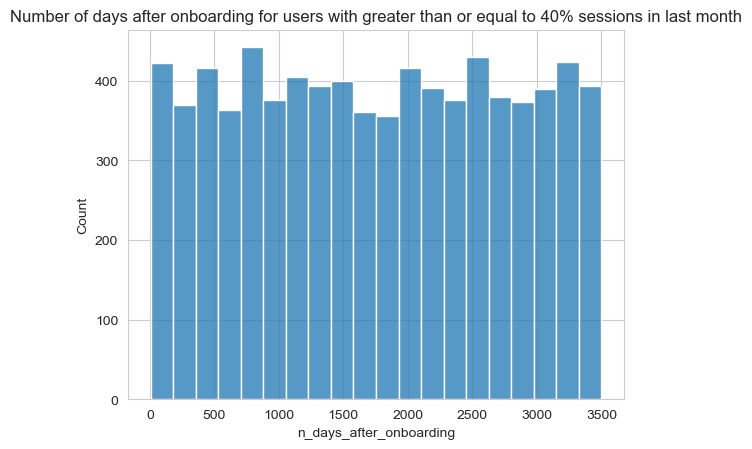

In [49]:
data = df[df['percent_sessions_in_last_month'] >= 0.40]
fig = sns.histplot(x=data['n_days_after_onboarding'])
fig.set_title('Number of days after onboarding for users with greater than or equal to 40% sessions in last month')
plt.show()

> The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. It's worth investigating why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what will be the selected machine learning model, it may be useful to impute outlying data with more reasonable values. 

#### Setting a threshold based on the 95th percentile value of the specific variable: 

In [51]:
def impute_outlier(column_str, percentile):
    threshold = df[column_str].quantile(percentile)
    df.loc[df[column_str] > threshold, column_str] = threshold

    print(f'{column_str:>25}| percentile: {percentile} | threshold: {threshold}')

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [52]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']: 
    impute_outlier(column, 0.95)

                 sessions| percentile: 0.95 | threshold: 243.0
                   drives| percentile: 0.95 | threshold: 201.0
           total_sessions| percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives| percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives| percentile: 0.95 | threshold: 4668.899348999998


Call `describe()` to see if your change worked.

In [53]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

### **Task 4a. Results and evaluation**

**Learnings from the exploratory data analysis:**
* Further data processing is needed to deal with the missing data in the `label` column before further analysis. 
* Variable transformation is needed to stabilize the variation for many outlying observations.
* The number of drives and the number of sessions are strongly correlated, they might provide redundant information if both variables were incorporated in a model.
* On average, retained users have fewer drives than churned users.

My other questions are: 
* How does the missingness in the user churn label arise?
* Who are the users with an extremely large number of drives? Are they ridesharing drivers or commercial drivers?
* Why do retained users have fewer drives than churned users? Is it because churned users have a longer history of using the Waze app?
* What is the user demographic for retained users and churned users? 
* What are the key variables associated with user churn?
* Can we implement policies to reduce user churn? 

### **Task 4b. Conclusion and Recommendations**

#### Conclusion: 
> * The variable's distribution is either right-skewed or uniformly distributed. 
>> *Variables with the right-skewed distribution:* Many users had values in the lower part of the range for that variable.     
>> *Variables with uniform distributions:* The users were generally equally likely to have values anywhere the range for that variable.
>   
> * Generally, the dataset is not erroneous. There is no indication that a single variable is entirely wrong.  However, the `driven_km_drives` had highly improbable or perhaps even impossible outlying values. For example, the maximum value in the `driven_km_drives` column is 21,183 km, which is more than half the circumference of the earth.
>   
> * Also, the variables `activity_days` and `driving_days` might be erroneous since these two monthly variables has different maximum value, 31 days for the activity days while 30 days for the driving days.  Although it’s possible that not a single user drove all 31 days of the month, it’s highly unlikely, considering there are ~15,000 people represented in the dataset. One possible reason for this is the data collection might not have occurred in the same month.
>
> * Approximately 82% of the Waze's app users are retained while less than 18% users churned.
> * Distance driven per driving day had a positive correlation with user churn. Users who drive very long distances on driving days are more likely to churn.
> * The number of driving days had a negative impact on user churn. 
The more times the user used the app while driving, the less likely they were to churn. While 40% of the users who didn’t use the app at all churned, nobody who used the app for 30 days churned.
> * Users of all tenures ranging from near zero to approximately 10 years were nearly equally represented in the data.
> * The proportion of churned users to retained users is consistent between device types.
> * Users of all tenures ranging from near zero to approximately 10 years were nearly equally represented in the data. This is based on the plotted histogram of `n_days_afer_onboarding`, which shows a uniform distribution for this variable. This means the users tenure are equally likely to have values in that `n_days_afer_onboarding` variable's range.
#### Recommendations for the next steps after EDA:
> * Look over the erroneous discrepancies between variables: activity_days and driving_days. 
> * Investigate further the user profile to gain insights on the reasons for long-distance user’s higher churn rate.
> * Conduct in-depth statistical analyses on the variables to determine their impact on user churn. 

### [Link to the Executive summary for Exploratory Data Analysis](https://docs.google.com/presentation/d/1noWXBPMM9l84pXsyfJjuDne_d7jFc4Fe7YbBS3Ixymc/edit?usp=sharing)